In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/Credit Card Defaulter Prediction.csv')

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Y
1,2,120000,F,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Y
2,3,90000,F,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,N
3,4,50000,F,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,N
4,5,50000,M,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,N


In [ ]:
df.shape

(30000, 25)

In [ ]:
df.dtypes

ID            int64
LIMIT_BAL     int64
SEX          object
EDUCATION    object
MARRIAGE     object
AGE           int64
PAY_0         int64
PAY_2         int64
PAY_3         int64
PAY_4         int64
PAY_5         int64
PAY_6         int64
BILL_AMT1     int64
BILL_AMT2     int64
BILL_AMT3     int64
BILL_AMT4     int64
BILL_AMT5     int64
BILL_AMT6     int64
PAY_AMT1      int64
PAY_AMT2      int64
PAY_AMT3      int64
PAY_AMT4      int64
PAY_AMT5      int64
PAY_AMT6      int64
default      object
dtype: object

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Adjust the width as needed

encode the label using label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['default '] = encoder.fit_transform(df['default '])

In [ ]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df['default '].value_counts()

0    23364
1     6636
Name: default , dtype: int64

this is an imbalanced dataset.

Split features and target

In [ ]:
feature_df = df.drop(['default '], axis=1)

In [ ]:
feature_df.shape

(30000, 24)

In [ ]:
feature_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,F,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,2,120000,F,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,F,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,F,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,M,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [ ]:
target_df = df['default ']
target_df.shape

(30000,)

there are no missing values so no imputaion

Next we need to seperate numerical and categorical features to do scaling. numerical features need scaling. we do one hot encoding for cat features and they do not need scaling.

In [ ]:
num_features = feature_df[['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

In [ ]:
cat_features = feature_df[['SEX', 'EDUCATION', 'MARRIAGE']]

Scale the numeric features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
num_features = scaler.fit_transform(num_features)

In [ ]:
num_features.dtypes

AttributeError: ignored

make num_features to dataframe

In [ ]:
num_features_df = pd.DataFrame(num_features, columns=['LIMIT_BAL','AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [ ]:
num_features_df

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,0.381275,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,1.870379,2.018136,2.326690,0.695474,-0.149259,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,0.815221,-0.874991,-0.723570,-0.696663,-0.666599,0.234917,0.253137,-0.672786,-0.665299,-0.627430,-0.532924,-0.577691,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,0.164303,3.574267,2.617654,1.809921,-0.666599,0.234917,0.253137,-0.647227,-0.643830,-0.638158,-0.347961,-0.324517,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,0.598248,0.904712,-0.723570,0.138865,0.188746,0.234917,-0.616452,-0.717982,0.410269,0.422373,0.147844,-0.468063,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [ ]:
num_features_df.dtypes

LIMIT_BAL    float64
AGE          float64
PAY_0        float64
PAY_2        float64
PAY_3        float64
PAY_4        float64
PAY_5        float64
PAY_6        float64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [ ]:
n

NEXT HANDLE CATEGORICAL FEATURES USING ONE HOT ENCODING

In [ ]:
cat_features_df = pd.get_dummies(cat_features)

In [ ]:
type(cat_features_df)

pandas.core.frame.DataFrame

combine numerical and categorical features to build model

In [ ]:
features_df = pd.concat([num_features_df, cat_features_df], axis=1)

In [ ]:
features_df.head()

NameError: ignored

In [ ]:
features_df.shape

(30000, 32)

In [ ]:
feature_df.shape

(30000, 24)

Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features_df, target_df, train_size=0.8)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24000, 32), (6000, 32), (24000,), (6000,))

reset index

In [ ]:
x_train.reset_index(inplace=True, drop=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

XGBOOST

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
modelXG = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size for updates
    max_depth=3,        # Maximum depth of each tree
    subsample=0.8,      # Fraction of samples used for fitting each tree
    colsample_bytree=0.8,  # Fraction of features used for fitting each tree
    objective='binary:logistic',  # Binary classification problem
    random_state=42
)

In [ ]:
modelXG.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_pred = modelXG.predict(x_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.8215
Precision: 0.6949
Recall: 0.3558
F1 Score: 0.4706
ROC AUC: 0.6555


Building a Logistic regression model

In [ ]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

Training performance

In [ ]:
accuracy_score(y_train, modelLR.predict(x_train))

0.8097916666666667

Test performance

In [ ]:
accuracy_score(y_test, modelLR.predict(x_test))

0.817

In [ ]:
index_value = 3  # Example index value

# Get the feature values for the specific example using its index
single_example_features = features_df.iloc[3].values.reshape(1, -1)

# Make predictions using the model
prediction = modelLR.predict(single_example_features)

# Print the prediction
print("Prediction:", prediction)





Prediction: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


to know where our model is struggling plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, modelLR.predict(x_test))

array([[4575,  122],
       [ 976,  327]])

visual display of confusion matrix

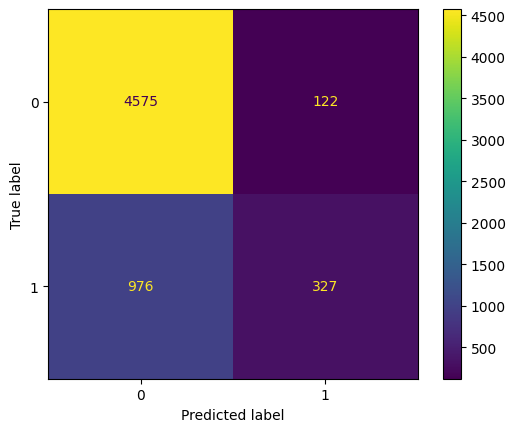

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, modelLR.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = modelLR.classes_)
disp.plot()
plt.show()

model is struggling to identify  defaulters so caluculate precision

In [ ]:
def calculate_precision(true_positives, false_positives):
    return true_positives / (true_positives + false_positives)


In [ ]:
calculate_precision(321, 140)

0.6963123644251626

In [ ]:
def calculate_recall(true_positives, false_negatives):
    return true_positives / (true_positives + false_negatives)

In [ ]:
calculate_recall(321, 986)

0.24560061208875286

In [ ]:
def calculate_f1_score(true_positive, false_positive, false_negative):
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)

    f1_score = (2 * precision * recall) / (precision + recall)
    return f1_score

# Example values
true_positive = 4553
false_positive = 140
false_negative = 986

f1_score = calculate_f1_score(true_positive, false_positive, false_negative)
print("F1 Score:", f1_score)








F1 Score: 0.8899530883502738


In a credit card defaulter prediction problem, where the classes are imbalanced (defaulters are usually a small fraction of the total population), using accuracy alone as the performance metric can be misleading. This is because the model can achieve high accuracy by simply predicting the majority class (non-defaulters) all the time, while still performing poorly on the minority class (defaulters).

THE MODEL IS UNDERFITTING if i consider accuracy





Hyperparameter tuning in Logistic regression using gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(estimator=modelLR, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_


In [ ]:
best_params

{'C': 100, 'penalty': 'l2'}

In [ ]:
best_modelLR = grid_search.best_estimator_
y_pred = best_modelLR.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.817

precision and recall after hyperparameter tuning

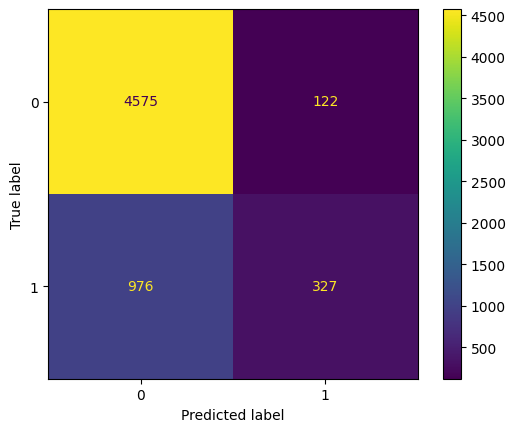

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, best_modelLR.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = best_modelLR.classes_)
disp.plot()
plt.show()

In [ ]:
calculate_precision(321,141)

0.6948051948051948

In [ ]:
calculate_recall(321,986)

0.24560061208875286

Improving the model(Model tuning)

Check for outliers(we can do this using statistical methods and visulaization techniques)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import zscore

In [ ]:
z_scores = np.abs(zscore(features_df))

In [ ]:
outliers = np.where(z_scores > 3)

In [ ]:
num_outliers = len(outliers[0])

In [ ]:
num_outliers

8333

In [ ]:
print(outliers)

(array([    6,     6,     6, ..., 29997, 29998, 29998]), array([ 8,  9, 10, ...,  2, 14, 18]))


Visualize outliers using Box plots

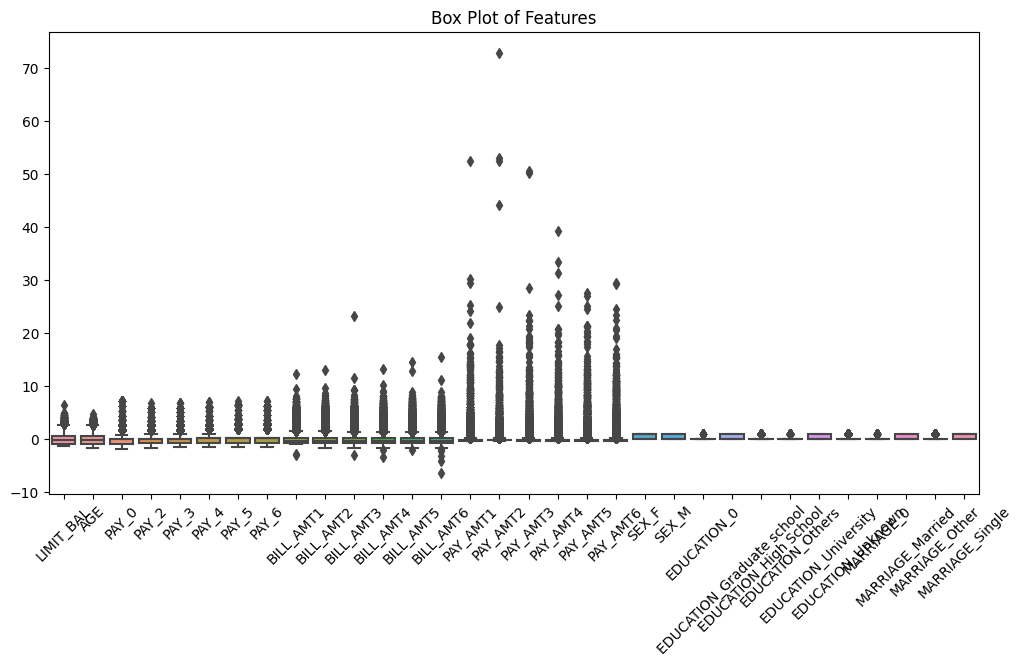

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=features_df)
plt.title("Box Plot of Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
####sns.pairplot(feature_df)
#####plt.title("Pairwise Scatter Plots")
#####plt.show()

Handling outliers

do cube root transformation

In [ ]:
import numpy as np
trans_features_df = np.cbrt(features_df)

visualize tran_features_df

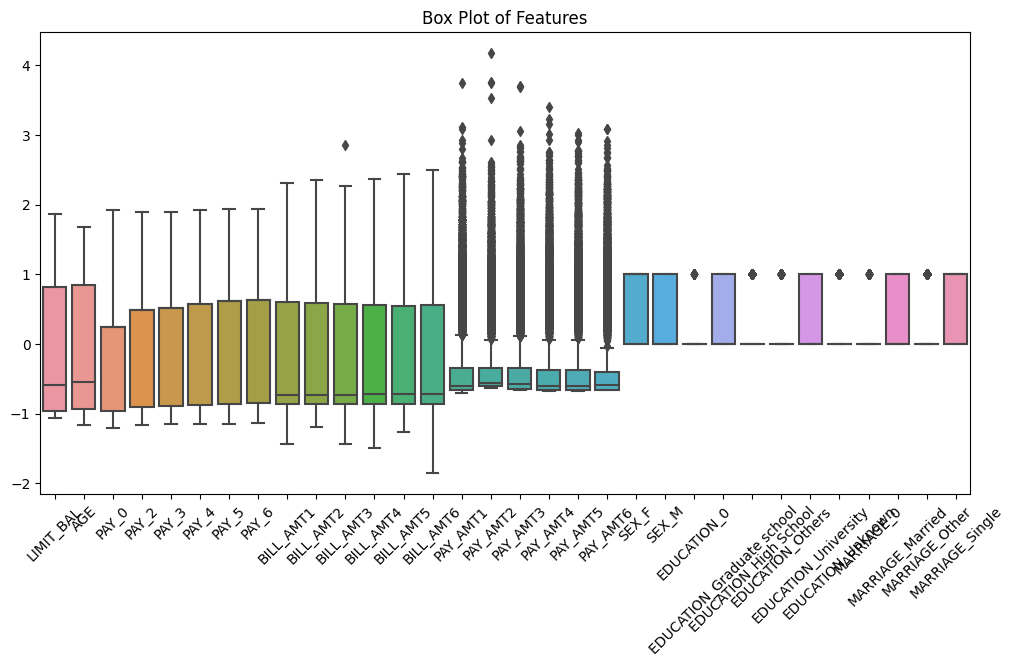

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=trans_features_df)
plt.title("Box Plot of Features")
plt.xticks(rotation=45)
plt.show()

now again find the number of outliers

In [ ]:
z_scores = np.abs(zscore(trans_features_df))

In [ ]:
outliers1 = np.where(z_scores > 3)

In [ ]:
num_outliers1= len(outliers1[0])

In [ ]:
num_outliers1

3575

In [ ]:
8333-3575

4758

I could transform only 4758 outliers out of 8333 outliers

now train the model after transforming outliers

In [ ]:
x1_train, x1_test, y1_train, y1_test = train_test_split(trans_features_df, target_df, train_size=0.8)

In [ ]:
x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((24000, 32), (6000, 32), (24000,), (6000,))

In [ ]:
model1 = LogisticRegression(max_iter=1000)
model1.fit(x1_train, y1_train)

LogisticRegression(max_iter=1000)

In [ ]:
accuracy_score(y1_train, model1.predict(x1_train))

0.7934583333333334

In [ ]:
accuracy_score(y1_test, model1.predict(x1_test))

0.7868333333333334

so the transformation to reduce outliers dint work but the performance decreased

In [ ]:
features_df.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_F,SEX_M,EDUCATION_0,EDUCATION_Graduate school,EDUCATION_High School,EDUCATION_Others,EDUCATION_University,EDUCATION_Unknown,MARRIAGE_0,MARRIAGE_Married,MARRIAGE_Other,MARRIAGE_Single
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1,0,0,0,0,0,1,0,0,1,0,0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1,0,0,0,0,0,1,0,0,0,0,1
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,1,0,0,0,0,0,1,0,0,0,0,1
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,1,0,0,0,0,0,1,0,0,1,0,0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0,1,0,0,0,0,1,0,0,1,0,0


TRAIN THE MODEL USING KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=3)
model_KNN.fit(x1_train, y1_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
accuracy_score(y1_test, model_KNN.predict(x1_test))

0.7731666666666667

In [ ]:
loss = log_loss(y_test, model_KNN.predict(x_test))

NameError: ignored

In [ ]:
loss

NameError: ignored

In [ ]:
confusion_matrix(y_test, model_KNN.predict(x_test))

array([[4130,  512],
       [ 880,  478]])

In [ ]:
accuracy_score(y_test, model_KNN.predict(x_test))

0.768

In [ ]:
PRECISION =4438/(4438+305)

In [ ]:
PRECISION

0.9356947079907232

In [ ]:
RECALL = 530/(727+530)

In [ ]:
RECALL

0.4216388225934765

Hyperparameter tuning in knn model

In [ ]:
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

In [ ]:
grid_search_KNN = GridSearchCV(estimator=model_KNN, param_grid=param_grid_KNN, scoring='accuracy', cv=5)
grid_search_KNN.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
best_params_KNN = grid_search_KNN.best_params_
best_model_KNN = grid_search_KNN.best_estimator_

In [ ]:
y_pred_KNN = best_model_KNN.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_KNN)

0.794

to find best value of k to acheive better performance

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
losses = []
k_values = []
for i in range(2,20):
      model = KNeighborsClassifier(n_neighbors=i)
      model_KNN.fit(x1_train, y1_train)
      loss = log_loss(y1_test, model_KNN.predict(x1_test))
      losses.append(loss)
      k_values.append(i)

In [ ]:
k_values

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [ ]:
losses

[7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099,
 7.875538265522099]

Train the model using Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelDT = DecisionTreeClassifier()
modelDT.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score(y_test, modelDT.predict(x_test))

0.7203333333333334

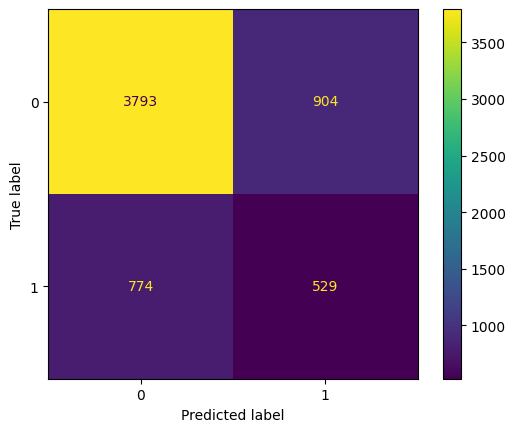

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, modelDT.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = modelDT.classes_)
disp.plot()
plt.show()

In [ ]:
precision = 531/(531+903)

In [ ]:
precision

0.3702928870292887

In [ ]:
recall = 531/(531+776)

In [ ]:
recall

0.40627390971690897

modelDT hyperparameter tuning

In [ ]:
param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_DT = GridSearchCV(estimator=modelDT, param_grid=param_grid_DT, scoring='accuracy', cv=5)
grid_search_DT.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
best_params = grid_search_DT.best_params_
best_model_DT = grid_search_DT.best_estimator_


In [ ]:
best_params

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [ ]:
y_pred_DT = best_model_DT.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred_DT)

0.8243333333333334

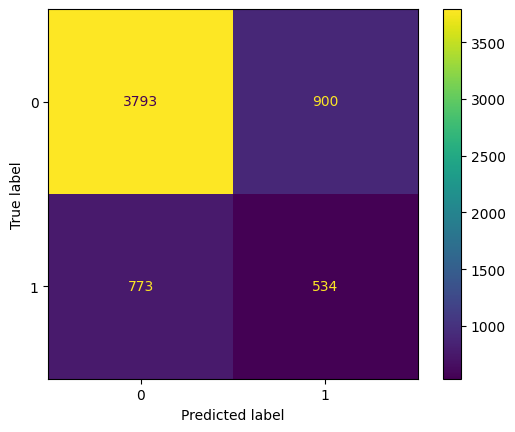

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, best_model_DT.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = best_model_DT.classes_)
disp.plot()
plt.show()

In [ ]:
calculate_precision(534,900)

0.3723849372384937

In [ ]:
calculate_recall(534, 773)

0.4085692425401683

model training using randomforests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(x_train, y1_train)

NameError: ignored

In [ ]:
accuracy_score(y1_test, modelRF.predict(x1_test))

0.8163333333333334

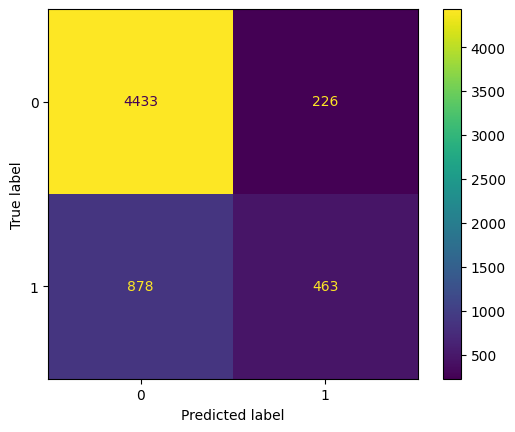

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, modelRF.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = modelRF.classes_)
disp.plot()
plt.show()

In [ ]:
precision = 4381/(4381+271)

In [ ]:
precision

0.9417454858125538

In [ ]:
recall = 482/(482+866)

In [ ]:
recall

0.35756676557863504

randomforest model hyperparameter tuning

In [ ]:
param_gridRT= {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_searchRT = GridSearchCV(estimator=modelRT, param_grid=param_gridRT, scoring='f1_macro', cv=5)
grid_searchRT.fit(x_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
best_paramsRT = grid_searchRT.best_params_
best_modelRT = grid_searchRT.best_estimator_


In [ ]:
y_predRT = best_modelRT.predict(x_test)


In [ ]:
accuracy_score(y_test, y_pred)

0.8058333333333333

boosting